In [1]:
#6.1.4
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#6.1.5
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
#6.1.5
#Create a set of random latitudes and longitude combination.
lats = np.random.uniform(-90.000,90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [4]:
#6.1.5
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(27.030902306346903, 140.64615795670858),
 (60.49903819765714, -109.45546414681385),
 (-89.17684882135458, 60.52348973873973),
 (-53.63901647157746, 27.533674398889502),
 (62.060121280978166, 64.09507555638726),
 (-82.31250543482115, -80.1148450991283),
 (6.848664482696108, -141.28067072307266),
 (25.534540182141484, 177.27132343895892),
 (81.60903994942714, 133.98430139303088),
 (59.21367161021783, -105.84510080598625),
 (46.744472792917975, -178.348720263008),
 (61.97465315992346, -151.40148325648508),
 (-73.99480394907593, 6.20557926740679),
 (52.1150647766778, 22.64126206715838),
 (-30.074984947578457, -28.35770749765112),
 (-53.74512823107078, -120.18518537729038),
 (24.416754403741237, -32.81956757320137),
 (-42.49695143832197, -64.1951579638037),
 (-19.030323571313232, -34.801747990819166),
 (-25.91143142074195, -120.86217454649636),
 (58.535138968260924, -145.13425887472818),
 (78.57379370885243, -160.16682883954167),
 (31.524065959416987, -47.545823658729034),
 (10.3560645329

In [5]:
#6.1.5
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
#6.2.6
#Import dependencies (requests)
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

#import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an endpoint URL for a city.
#city_url = url + "&q=" + "Boston"
#print(city_url)

In [7]:
##6.2.6


In [8]:
#6.2.6
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through the List of Cities and Build the City URL
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
    

#Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
#6.2.6
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shimoda
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | kommunisticheskiy
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | la ronge
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | kenai
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | miedzyrzec podlaski
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | puerto madryn
Processing Record 19 of Set 1 | caravelas
Processing Record 20 of Set 1 | palmer
Processing Record 21 of Set 1 | barrow
Processing Re

Processing Record 39 of Set 4 | maragogi
Processing Record 40 of Set 4 | fairbanks
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | hauterive
Processing Record 43 of Set 4 | qaanaaq
Processing Record 44 of Set 4 | shingu
Processing Record 45 of Set 4 | north bend
Processing Record 46 of Set 4 | nusaybin
Processing Record 47 of Set 4 | careiro da varzea
Processing Record 48 of Set 4 | catamarca
Processing Record 49 of Set 4 | manta
Processing Record 50 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 1 of Set 5 | huarmey
Processing Record 2 of Set 5 | muisne
Processing Record 3 of Set 5 | namatanai
Processing Record 4 of Set 5 | pouebo
Processing Record 5 of Set 5 | galgani
City not found. Skipping...
Processing Record 6 of Set 5 | pirgos
Processing Record 7 of Set 5 | rio sereno
Processing Record 8 of Set 5 | eyl
Processing Record 9 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set

Processing Record 26 of Set 8 | price
Processing Record 27 of Set 8 | orlik
Processing Record 28 of Set 8 | marcona
City not found. Skipping...
Processing Record 29 of Set 8 | gamba
Processing Record 30 of Set 8 | changji
Processing Record 31 of Set 8 | luanda
Processing Record 32 of Set 8 | boguchar
Processing Record 33 of Set 8 | da lat
Processing Record 34 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | plettenberg bay
Processing Record 37 of Set 8 | coihaique
Processing Record 38 of Set 8 | besuki
Processing Record 39 of Set 8 | camana
Processing Record 40 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 41 of Set 8 | ballina
Processing Record 42 of Set 8 | caldas novas
Processing Record 43 of Set 8 | lafia
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | mudgee
Processing Record 46 of Set 8 | orange cove
Processing Record 47 of Set 8 | teocaltiche
Processing Record 48 of S

Processing Record 12 of Set 12 | tlahualilo
City not found. Skipping...
Processing Record 13 of Set 12 | jiangkou
Processing Record 14 of Set 12 | zhanaozen
Processing Record 15 of Set 12 | westport
Processing Record 16 of Set 12 | riviere-au-renard
Processing Record 17 of Set 12 | kathmandu
Processing Record 18 of Set 12 | sylva
Processing Record 19 of Set 12 | fernie
Processing Record 20 of Set 12 | lakselv
Processing Record 21 of Set 12 | vila velha
Processing Record 22 of Set 12 | dalbandin
Processing Record 23 of Set 12 | port-cartier
Processing Record 24 of Set 12 | tura
Processing Record 25 of Set 12 | benghazi
Processing Record 26 of Set 12 | charters towers
Processing Record 27 of Set 12 | southbridge
Processing Record 28 of Set 12 | rock sound
Processing Record 29 of Set 12 | weiz
Processing Record 30 of Set 12 | yumen
Processing Record 31 of Set 12 | riverton
Processing Record 32 of Set 12 | villarrica
Processing Record 33 of Set 12 | gimbi
Processing Record 34 of Set 12 | u

In [9]:
#6.2.7
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
537,Liverpool,53.4106,-2.9779,70.68,70,20,1.99,GB,2021-09-16 16:24:28
538,Millinocket,45.6573,-68.7098,69.91,48,1,0.00,US,2021-09-16 16:28:53
539,Sassandra,4.9500,-6.0833,80.28,78,79,9.48,CI,2021-09-16 16:28:53
540,Senekal,-28.3197,27.6208,60.67,17,0,19.22,ZA,2021-09-16 16:28:54
541,Lamesa,32.7376,-101.9510,81.66,54,1,12.86,US,2021-09-16 16:28:54
542,Eirunepe,-6.6603,-69.8736,95.38,38,38,2.80,BR,2021-09-16 16:28:54
543,Diego De Almagro,-26.3667,-70.0500,75.38,12,0,7.65,CL,2021-09-16 16:28:55
544,Mindif,10.3976,14.4363,91.35,53,89,4.63,CM,2021-09-16 16:28:56
545,Salair,54.2312,85.7972,52.74,71,97,4.14,RU,2021-09-16 16:28:56
546,Port-Gentil,-0.7193,8.7815,78.03,80,22,13.04,GA,2021-09-16 16:28:56


In [10]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shimoda,JP,2021-09-16 16:25:22,34.6667,138.9500,71.64,85,97,10.96
1,Yellowknife,CA,2021-09-16 16:25:22,62.4560,-114.3525,41.52,75,40,11.50
2,East London,ZA,2021-09-16 16:25:22,-33.0153,27.9116,59.94,77,20,12.66
3,Port Elizabeth,ZA,2021-09-16 16:25:23,-33.9180,25.5701,57.49,67,40,17.27
4,Kommunisticheskiy,RU,2021-09-16 16:25:23,61.6789,64.4819,40.12,97,100,12.59
...,...,...,...,...,...,...,...,...,...
542,Eirunepe,BR,2021-09-16 16:28:54,-6.6603,-69.8736,95.38,38,38,2.80
543,Diego De Almagro,CL,2021-09-16 16:28:55,-26.3667,-70.0500,75.38,12,0,7.65
544,Mindif,CM,2021-09-16 16:28:56,10.3976,14.4363,91.35,53,89,4.63
545,Salair,RU,2021-09-16 16:28:56,54.2312,85.7972,52.74,71,97,4.14


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

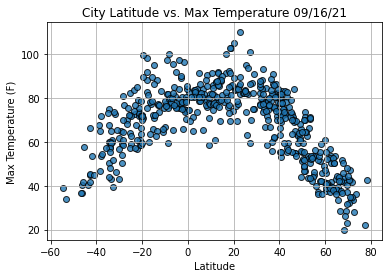

In [18]:
#6.3.1
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

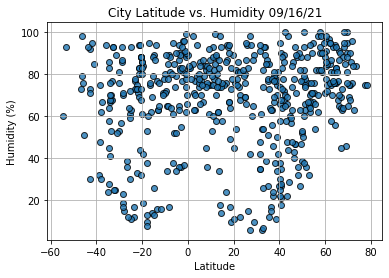

In [19]:
#6.3.2
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

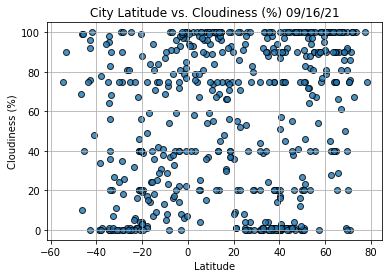

In [20]:
#6.3.3
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

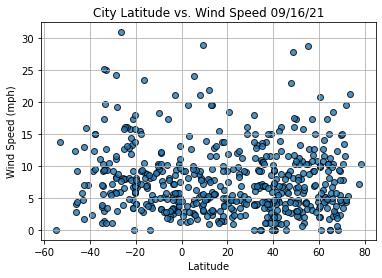

In [21]:
#6.3.4
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()